# PyTorch Workflow Fundamentals
### (One of many)

1. Get data ready (turn it into tensors)
2. Build or pick a pretrained model (suiting your problem)
    * Pick a loss function & optimizer
    * Build a training loop
    * Repeat step 2 until necessary.
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model


| Topic                                                    | Contents                                                                                                                          |
|----------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| 1. Getting data ready                                    | Data can be almost anything but to get started we're going to create a simple straight line                                       |
| 2. Building a model                                      | Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer, and build a training loop. |
| 3. Fitting the model to data (training)                  | We've got data and a model, now let's let the model (try to) find patterns in the (training) data.                                |
| 4. Making predictions and evaluating a model (inference) | Our model's found patterns in the data, let's compare its findings to the actual (testing) data.                                  |
| 5. Saving and loading a model                            | You may want to use your model elsewhere, or come back to it later, here we'll cover that.                                        |
| 6. Putting it all together                               | Let's take all of the above and combine it.                                                                                       |


<p>
    <img src="01.markdown_images/01_a_pytorch_workflow.png" alt="A PyTorch Workflow" width="840" height="480">
</p>

## Importing the necessary libraries

In [1]:
import torch
from torch import nn    # All of PyTorch's building blocks for Neural Networks
import matplotlib.pyplot as plt

## Data (Preparing and Loading)

Data can be almost anything (in ML):
* Excel spreadsheet
* Image(s)
* Video(s)
* Audio
* DNA
* Text
* etc.

Machine Learning is a game of two parts:
1. Get the data into numerical representation.
2. Build a model to learn patters in that numerical representation. 

<p>
    <img src="01.markdown_images/01-machine-learning-a-game-of-two-parts.png" alt="ML - A Game in Two Parts" width="840" height="480">
</p>

## Linear Regression

Using linear regression formula to make a straight line with *known* **parameters**.

#### Y = a + bX

where:
- **Y** is the dependent variable (*the outcome or response variable*).
- **X** is the independent variable (*the predictor or explanatory variable*).
- **a** is the intercept of the regression line (*the value of **Y** when **X** is 0*).
- **b** is the slope of the regression line (*the change in **Y** for a one-unit change in **X***).

In [2]:
# Creating known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

# .unsqueeze(dim=1) Adds 1 extra dimension
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], len(X), y[:10],len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 50,
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50)

## Splitting data int Training & Test sets

There are three types of datasets:
* ***Training set*** -> The model learns patterns from here
* ***Validation set*** -> Tune model patterns
* ***Test set*** -> See if the model is ready

| Split          | Purpose                                                                                                                      | Amount of total data | How often is it used?    |
|----------------|------------------------------------------------------------------------------------------------------------------------------|----------------------|--------------------------|
| Training set   | The model learns from this data (like the course materials you study during the semester).                                   | ~60-80%              | Always                   |
| Validation set | The model gets tuned on this data (like the practice exam you take before the final exam).                                   | ~10-20%              | Often but not always     |
| Testing set    | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10-20%              | Always                   |


**Generalization**: The ability for a machine learning model to perform well on data it hasn't seen.

In [3]:
# Creating a train/test split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
# Printing the training sets
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

## "Visualize, visualize, visualize!"

Visualising our data for better understanding of it.

In [5]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions,
                     ):
    """
    PLots training data, test data and compares predictions.
    """
    
    # Creating a plot figure
    plt.figure(figsize=(10, 7))
    
    # Plotting the training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    # Plotting the training data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    # Check if there are predictions
    if predictions is not None:
        # Plot predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    # Show the legend
    plt.legend(prop={"size": 12})

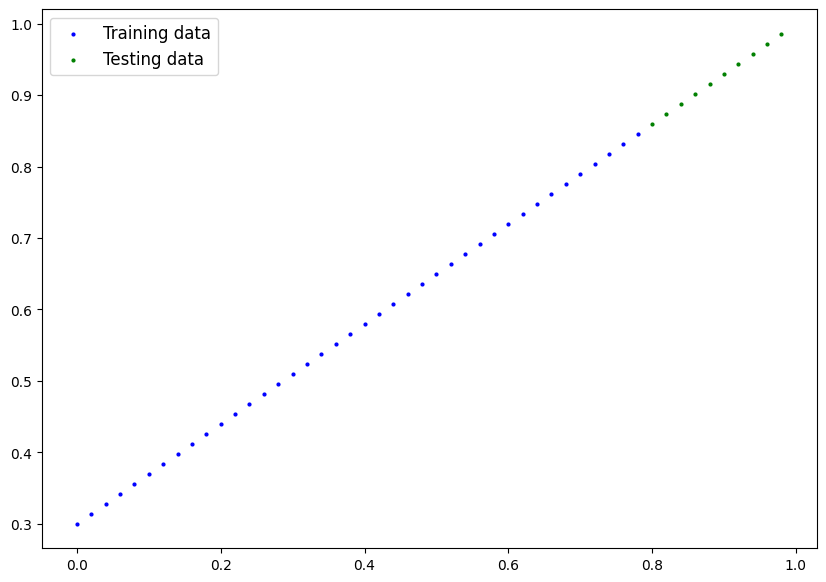

In [6]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=None)

## Building our first model

The first model will be using Linear Regression. 

What this model does: 
* Start with random values (weight & bias)
* Look at the training data and adjust the random values to better represent (*or get closer to*) the ideal values (*the weight & bias values we used to create the data*).

This will be done via two main algorithms:
1. Gradient descent
    * [3Blue1Brown](https://www.youtube.com/watch?v=IHZwWFHWa-w)
    * [towardsdatascience.com](https://towardsdatascience.com/gradient-descent-explained-9b953fc0d2c)
2. Backpropagation
    * [3Blue1Brown](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
    * [towardsdatascience.com](https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd)

## PyTorch model building essentials

| PyTorch module        | What does it do?                                                                                                                                                                                                                                  |
|-----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `torch.nn`            | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).                                                                                                                 |
| `torch.nn.Parameter`  | Stores tensors that can be used with `nn.Module`. If `requires_grad=True`, gradients (used for updating model parameters via gradient descent) are calculated automatically; this is often referred to as "autograd".                             |
| `torch.nn.Module`     | The base class for all neural network modules; all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| `torch.optim`         | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss).                                                                   |
| `def forward()`       | All `nn.Module` subclasses require a `forward()` method; this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g., the linear regression formula above).                                          |

* [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) -> contains the larger building blocks (layers)
* [`nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) -> contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
* `forward()` -> tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)
* [`torch.optim`](https://pytorch.org/docs/stable/optim.html) -> contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data


#### [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html)

In [7]:
# Creating Linear Regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Weight parameter
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True, # Setting Requirement for Gradient Descent as True
                                                dtype=torch.float)) # Setting default dtype float32
        
        # Bias parameter
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True, # Setting Requirement for Gradient Descent as True
                                             dtype=torch.float)) # Setting default dtype float32
    
    # Forward method defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:     # "x" is the input data
        return self.weights * x + self.bias  # Linear Regression formula; "x" is the input data

#### Basic building blocks of creating a PyTorch model by subclassing nn.Module. For objects that subclass nn.Module, the forward() method must be defined.

<p>
    <img src="01.markdown_images/01-pytorch-linear-model-annotated.png" alt="PyTorch Linear Model Annotated" width="840" height="480">
</p>

### Checking the contents of our fist created model

The contents of the model can be viewed with `.parameters`

In [8]:
# Creating a random seed 
torch.manual_seed(42)

# Creating an instance of the model (this is a subclass of `nn.Module`)
model_0 = LinearRegressionModel()

# Checking our model's parameters (List unnamed parameters)
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
print(model_0.state_dict())

OrderedDict({'weights': tensor([0.3367]), 'bias': tensor([0.1288])})


### Making predictions using [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.autograd.grad_mode.inference_mode.html)

To check our model's predictive power, we test how well it redicts `y_test` based on `X_test`.

When we pass data through our model, it will run it through our `forward()` method.

In [10]:
# Make predictions with a model
with torch.inference_mode():
    y_predictions = model_0(X_test)

In [11]:
# Results for y_predictions
y_predictions

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
# Results for y_test
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

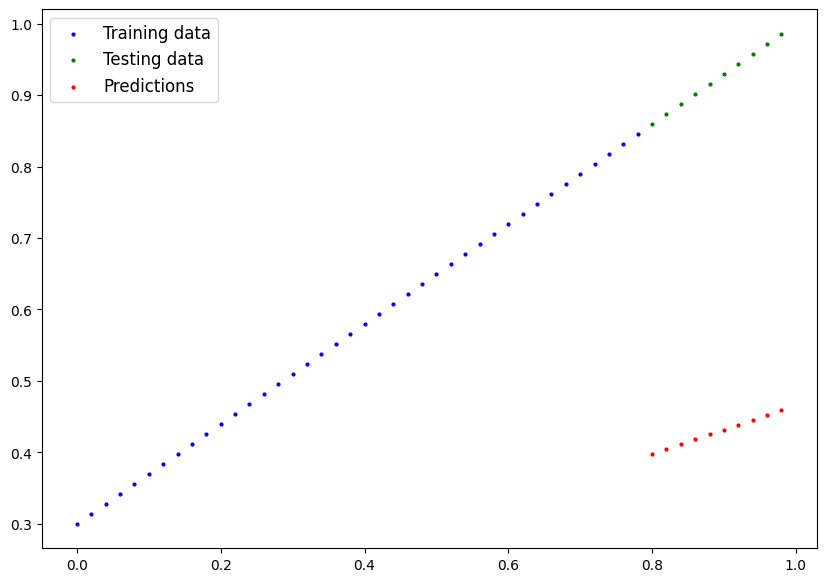

In [13]:
# Visualising the data
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_predictions)

# Because we are using random data, our predictions are way off.